## Q2 Single Variable Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import packages and load data
X_and_Y = np.load('./q2-least-square.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)

### 2.1: 2D Scatterplot

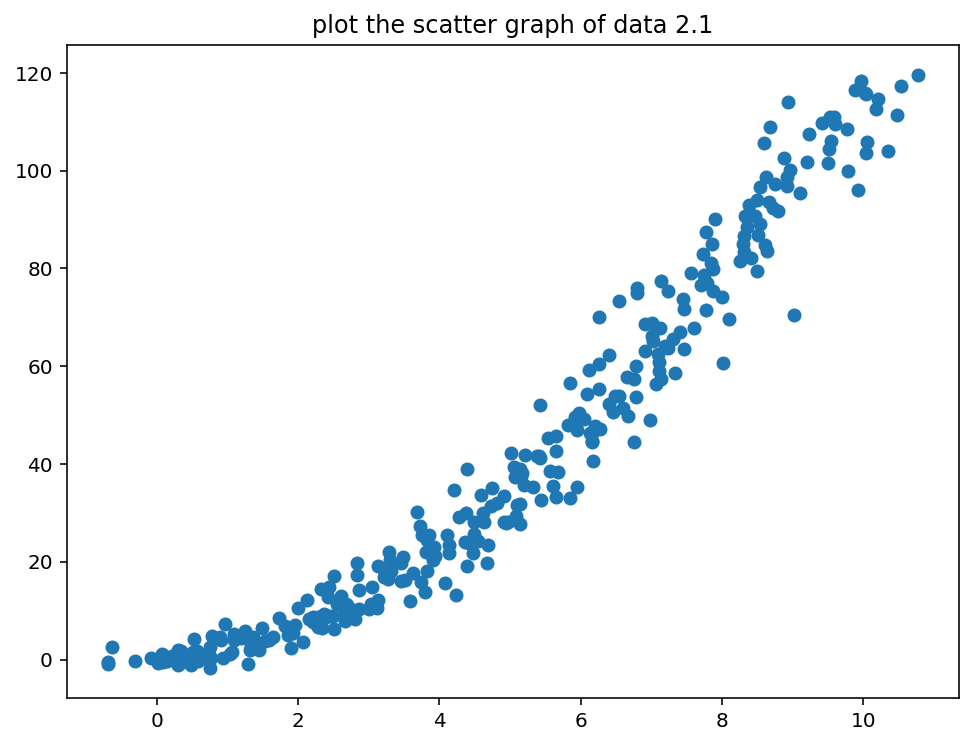

In [3]:
# TODO: Plot the a scatter graph of data.
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X,Y, cmap=plt.cm.Set1)
plt.title('plot the scatter graph of data 2.1')
plt.show()

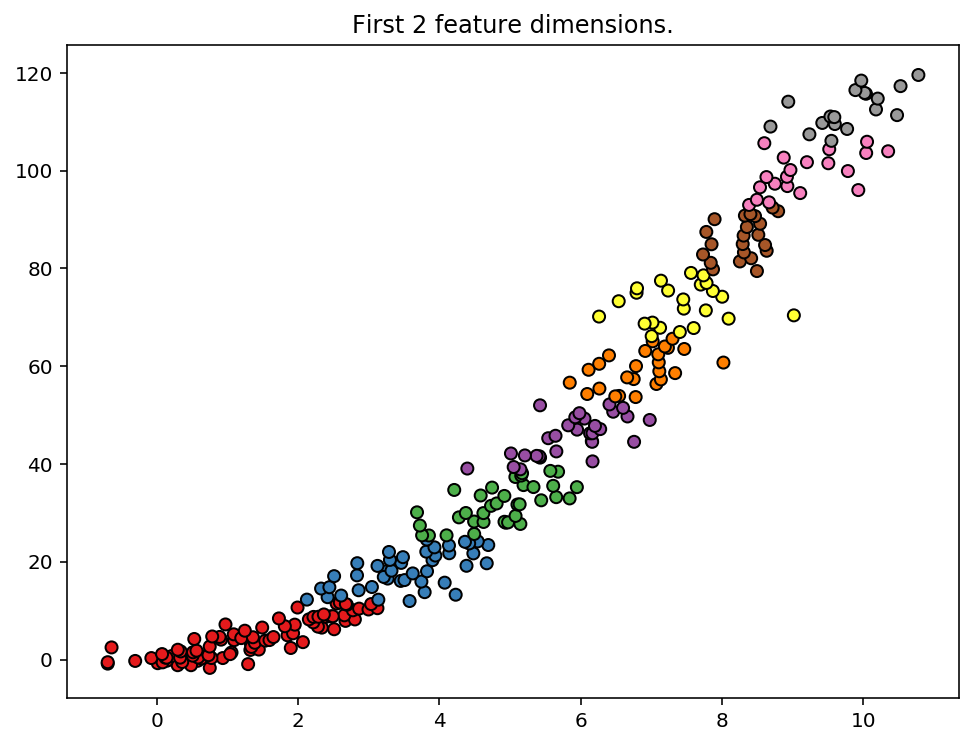

In [4]:
import matplotlib.pyplot as plt
X0 = np.ones((300,1))
XTest = X.reshape(300,  1)
test = np.append(X0,XTest, axis=1)
# First 2 Feature Dimensions
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(test[:, 1], Y, c=Y, cmap=plt.cm.Set1, edgecolor='k')
plt.title('First 2 feature dimensions.')
plt.show()

In [5]:
totalX = 0
#sum of X*X * Y
for i in range(len(X)):
    totalX += X[i]
print("total X",totalX)

totalX2 = 0
#sum of X^2
for i in range(len(X)):
    totalX2 += (X[i]**2)
print("total X^2",totalX2)

totalX3 = 0
#sum of X^3
for i in range(len(X)):
    totalX3 += (X[i]**3)
print("total X^3",totalX3)
totalX4 = 0
#sum of X^4
for i in range(len(X)):
    totalX4 += (X[i]**4)
print("total X^4",totalX4)

totalY = 0
#sum of X*X * Y
for i in range(len(Y)):
    totalY += Y[i]
print("total Y",totalY)

totalY2 = 0
#sum of X^2
for i in range(len(X)):
    totalY2 += (Y[i]**2)
print("total Y^2",totalY2)

totalXY = 0
#sum of X*X * Y
for i in range(len(X)):
    totalXY += X[i] * Y[i]
print("total XY",totalXY)

totalXXY = 0
#sum of X*X * Y
for i in range(len(X)):
    totalXXY += X[i]**2 * Y[i]
print("total XXY",totalXXY)

total X 1495.71453827
total X^2 10068.0697739
total X^3 76094.2632972
total X^4 615813.680732
total Y 12722.4432849
total Y^2 918684.804127
total XY 93739.7849208
total XXY 745830.80353


### 2.2: Compute the Least Sequare Line Using the Closed Form (Example Code)

In [6]:
# Compute the least square line over the given data
# Assume Y = w0 + w1 * X = (w0, w1).(1, X) = W.X1
# You might find the following functions useful: np.matrix, np.hstack, np.ones, reshape, dot

X0 = np.ones((300,1))
XTest = X.reshape(300,  1)
test = np.append(X0,XTest, axis=1)
t2 =np.transpose(test).dot(test) # 2x2 X^T * X

import numpy as np
from numpy.linalg import inv
A =np.transpose(test).dot(test) # 2x2 X^T * X
A = np.dot(inv(A), np.transpose(test))
w0,w1 = np.dot(A, Y)

print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


### 2.3: 2D Scatterplot & the Estimated Least Square Line

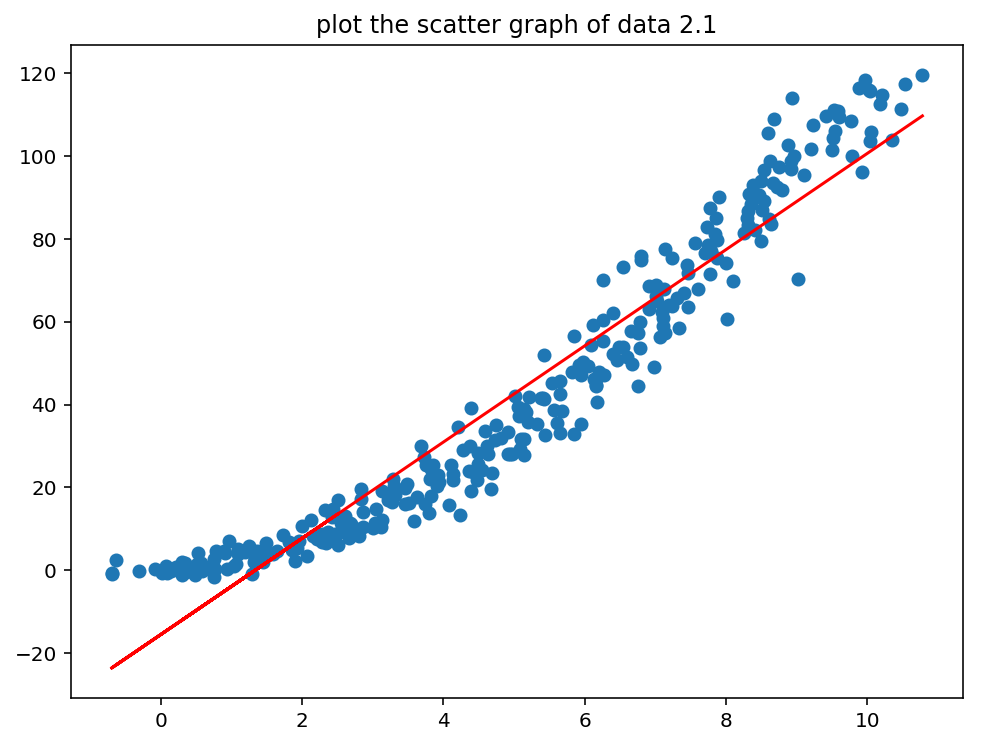

In [7]:
# TODO 3.  Plot the the estimated least square line on top of the scatter plot in (2).  
# The scatterplot and the line should be in the same figure.
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X,Y, cmap=plt.cm.Set1)
plt.plot(X, X * w1 + w0, color='r')
plt.title('plot the scatter graph of data 2.1')
plt.show()

In [8]:
X0 = np.ones((300,1))
XTest = X.reshape(300,  1)
test = np.append(X0,XTest, axis=1)
array = []
for i in range(300): 
    array.append([(test[i][1])**2])
test = np.hstack((test, array))
t2 =np.transpose(test).dot(test)
import numpy as np
from numpy.linalg import inv
A = t2 # 3x3 X^T * X
A = np.dot(inv(A), np.transpose(test))
print(t2)



[[  3.00000000e+02   1.49571454e+03   1.00680698e+04]
 [  1.49571454e+03   1.00680698e+04   7.60942633e+04]
 [  1.00680698e+04   7.60942633e+04   6.15813681e+05]]


In [9]:
w0,w1,w2 = np.dot(A, Y)
print("w0", w0)
print("w1", w1)
print("w2", w2)

w0 -1.70934201647
w1 3.02079475101
w2 0.86580640176


### 2.4: Compute the Least Square Parabola Using the Closed Form

In [10]:
# TODO 4. Compute the least square parabola over the given data
# Assume Y = w0 + w1 * X + w2 * X^2 = (w0, w1, w2).(1, X, X^2) = W.X2
X0 = np.ones((300,1))
XTest = X.reshape(300,  1)
test = np.append(X0,XTest, axis=1)
array = []
for i in range(300): 
    array.append([(test[i][1])**2])
test = np.hstack((test, array))
t2 =np.transpose(test).dot(test)
import numpy as np
from numpy.linalg import inv
A = t2 # 3x3 X^T * X
A = np.dot(inv(A), np.transpose(test))
w0,w1,w2 = np.dot(A, Y)
print("w0", w0)
print("w1", w1)
print("w2", w2)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(w0, w1, w2))

w0 -1.70934201647
w1 3.02079475101
w2 0.86580640176
Y = -1.71 + 3.02*X + 0.87*X^2


### 2.5: 2D Scatterplot & the Estimated Parabola

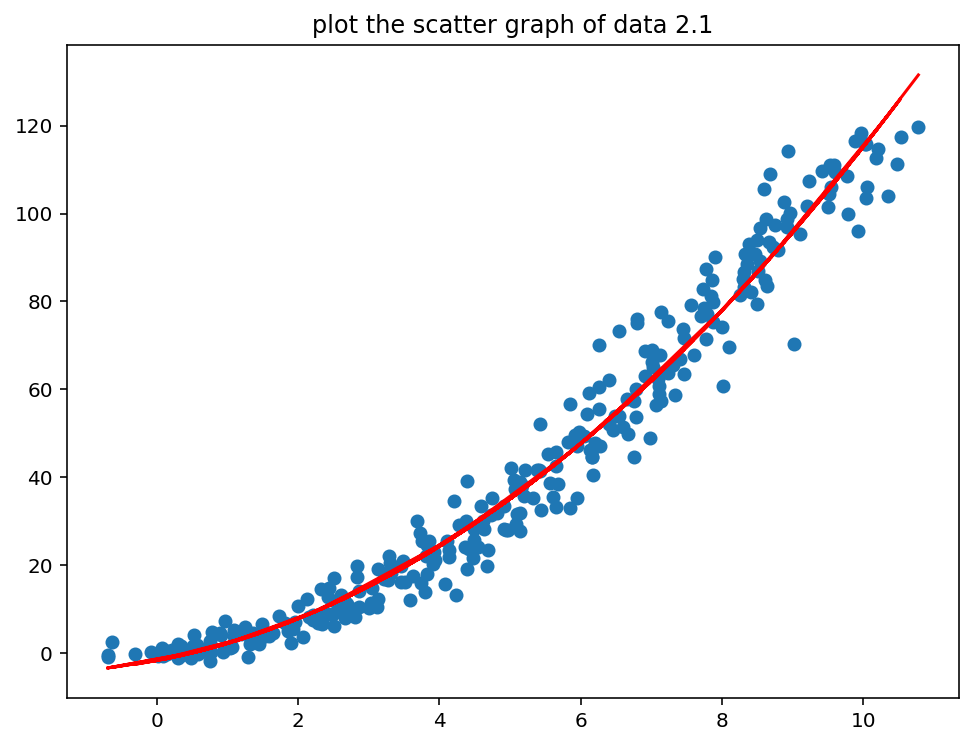

In [11]:
# TODO 5.  Plot the the estimated parabola on top of the scatter plot in (2). 
# The scatterplotand the parabola should be in the same figure
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X,Y, cmap=plt.cm.Set1)
plt.plot(X, X**2 *w2 + X * w1 + w0, color='r')
plt.title('plot the scatter graph of data 2.1')
plt.show()


## Q3 Multi-Variable Linear Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%config InlineBackend.figure_format = 'retina'

In [13]:
# Import packages and load data
X_and_Y = np.load('./q3-gradient-descent.npy')
X1 = X_and_Y[:, 0]    # Shape: (900,)
X2 = X_and_Y[:, 1]    # Shape: (900,)
Y  = X_and_Y[:, 2]    # Shape: (900,)
print(X1.shape, X2.shape, Y.shape)

(900,) (900,) (900,)


### 3.1: 3D Scatterplot

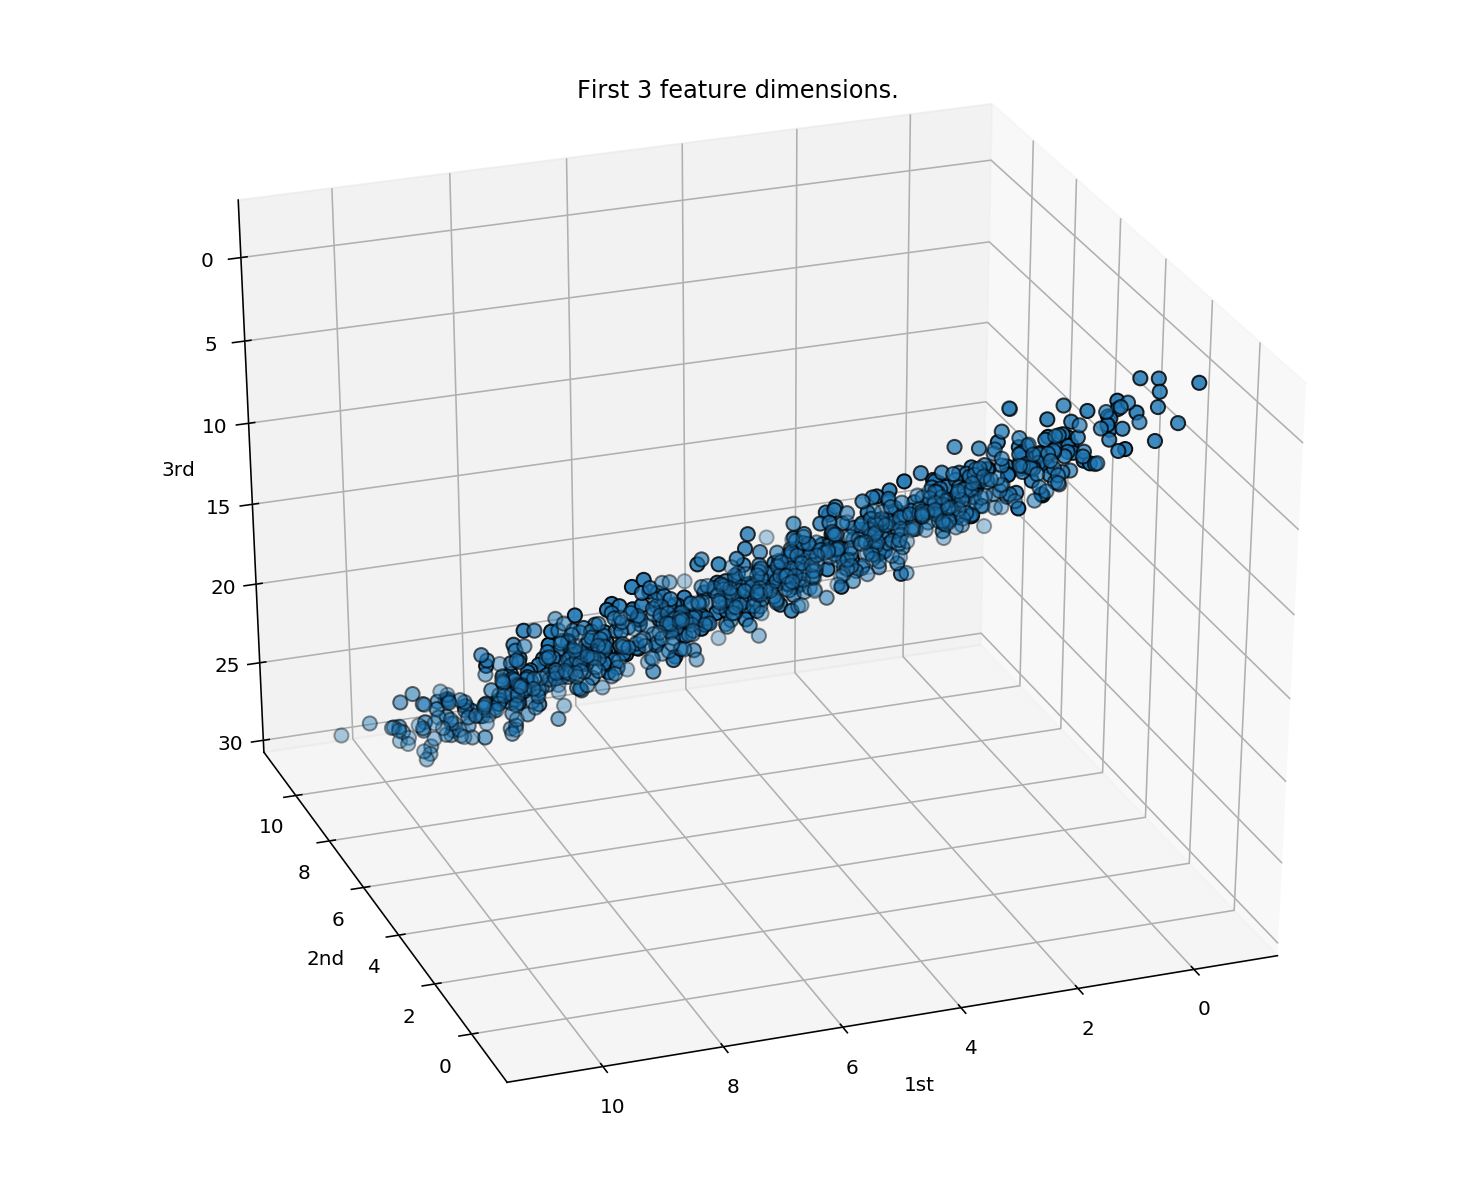

In [14]:
# TODO: Plot the a scatter graph of data.
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X1, X2, Y, edgecolor='k', s=50)
ax.set_title("First 3 feature dimensions.")
ax.set_xlabel("1st")
ax.set_ylabel("2nd")
ax.set_zlabel("3rd")

plt.show()

### 3.2 Compute the Least Square Plane Using the Closed Form

In [15]:
X0 = np.ones((len(X1),1))
x1 = X1.reshape(len(X1),  1)
xTest = np.append(X0,x1, axis=1)
x2 = X2.reshape(len(X2),  1)
xTest = np.hstack((xTest, x2))
#array = []
#for i in range(300): 
#    array.append([(test[i][1])**2])
#t3 =np.transpose(test3).dot(test3)
import numpy as np
from numpy.linalg import inv
t3 =np.transpose(xTest).dot(xTest) 
A3 = np.dot(inv(t3), np.transpose(xTest))
w0,w1,w2 = np.dot(A3, Y)
print("w0", w0)
print("w1", w1)
print("w2", w2)

w0 -0.697839073411
w1 0.981779268473
w2 1.94080030581


In [16]:
# TODO: Compute the least square Plane over the given data
# Assume Y = w0 + w1 * X1 + W2 * X2 = (w0, w1, w2).(1, X1, X2) = W.X

print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


### 3.3: 3D Scatterplot & the Estimated Least Square Plane

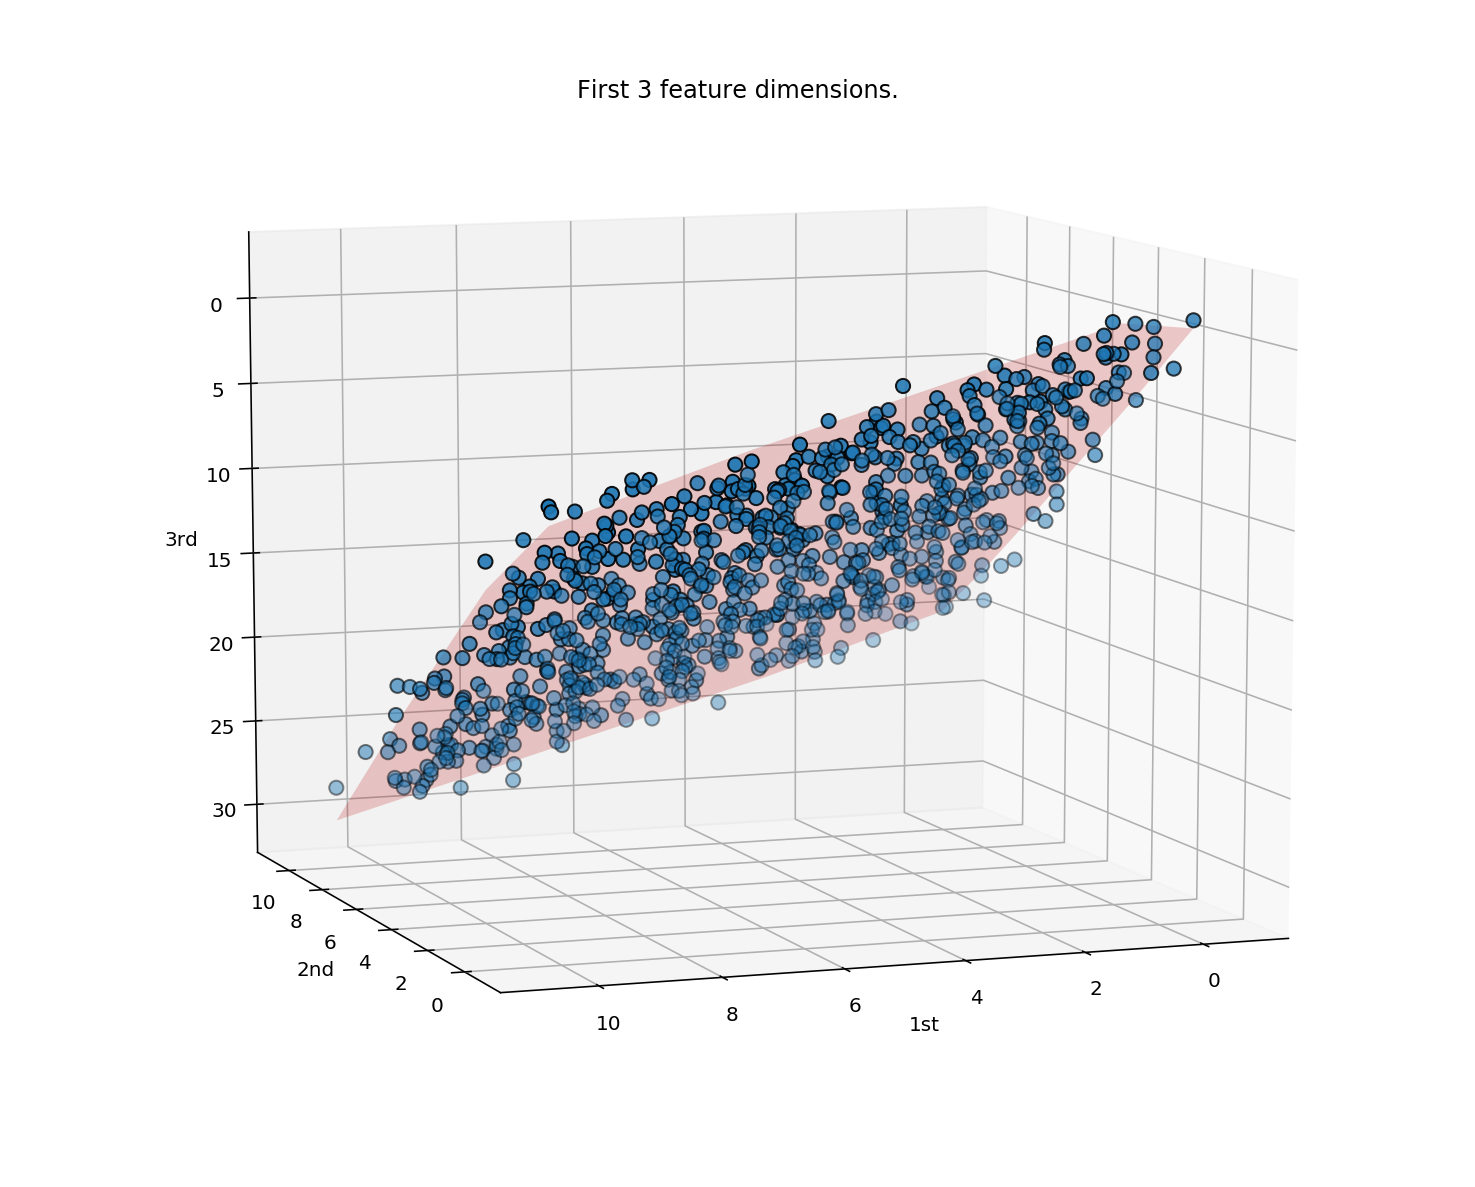

In [17]:
# TODO: Plot the scatter graph of data and estimated plane using the closed form solu-tion.
# TODO: Plot the a scatter graph of data.
fig = plt.figure(1, figsize=(10, 8))
ax = Axes3D(fig, elev=-170, azim=110)

ax.plot_trisurf(X1, X2, w0 + w1 * X1 + w2*X2,alpha=0.2 ,color='red')
ax.scatter(X1, X2, Y, edgecolor='k', s=50)
ax.set_title("First 3 feature dimensions.")
ax.set_xlabel("1st")
ax.set_ylabel("2nd")
ax.set_zlabel("3rd")
plt.show()

### 3.4: Compute the gradient of g(W) with respect to W.
    Hint:  You have computed the analytic solution in problem 3

In [18]:
# TODO: g'(W)
def g_prime_W(X, Y, W):
    return 2 * np.dot(np.transpose(X),X,W) - 2 * np.dot(np.transpose(X),Y)

### 3.5 Compute the Least Squares Plane Using Gradient Descent

In [19]:
# TODO: Compute the least square Plane over the given data

print('Y = {:.2f} + {:.2f}*X1 + {:.2f}*X2'.format(w0, w1, w2))

Y = -0.70 + 0.98*X1 + 1.94*X2


### 3.6 Plot the training curve

In [22]:
# TODO: Plot the training curve

### 3.7 Plot the scatter graph of data and estimated plane using the gradient descent solution

In [ ]:
# TODO: Plot the scatter graph of data and estimated plane